In [1]:
#Importacion de librerias
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC-Airbnb-2023-data.csv',delimiter=',',header=0)
d1 = datos
print(d1)

                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name     host_id  host_name  \
0                  Skylit Midtown Castle      2845.0   Jennifer   
1                        BlissArtsSpace!      7356.0      Garon   
2     Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3       Large Furnished

In [16]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2456 non-null   object 
 1   name                            2066 non-null   object 
 2   host_id                         2061 non-null   float64
 3   host_name                       2061 non-null   object 
 4   neighbourhood_group             2061 non-null   object 
 5   neighbourhood                   2061 non-null   object 
 6   latitude                        2061 non-null   float64
 7   longitude                       2061 non-null   float64
 8   room_type                       2061 non-null   object 
 9   price                           2061 non-null   float64
 10  minimum_nights                  2061 non-null   float64
 11  number_of_reviews               2061 non-null   float64
 12  last_review                     18

## Limpieza del dataset

Se procede a tratar los campos NaN

In [20]:
#Se rellenan los datos "NaN" sustituyendolos por el promedio de la columna
d1.fillna(d1.mean(), inplace=True)
print(d1)


                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name       host_id  host_name  \
0                  Skylit Midtown Castle  2.845000e+03   Jennifer   
1                        BlissArtsSpace!  7.356000e+03      Garon   
2     Cozy Clean Guest Room - Family Apt  7.490000e+03  MaryEllen   
3       Large F

<ipython-input-20-f4fa8daa1219>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d1.fillna(d1.mean(), inplace=True)


In [21]:
d2 = d1.fillna(d1.mode().iloc[0])
d3 = d2.round(4)
print(d3)

                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name       host_id            host_name  \
0                  Skylit Midtown Castle  2.845000e+03             Jennifer   
1                        BlissArtsSpace!  7.356000e+03                Garon   
2     Cozy Clean Guest Room - Family Apt  7.490000e+03

## ESTRUCTURA DE DATASET


Estructura del dataset luego de limpiar la gran mayoria de sus datos, con el objetivo de obtener datos ordenados.


In [22]:
d3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2.845000e+03,Jennifer,Manhattan,Midtown,40.7536,-73.9856,Entire home/apt,150.0000,30.0000,49.000,2022-06-21,0.3000,3.0000,314.0000,1.000,NaN
1,5121,BlissArtsSpace!,7.356000e+03,Garon,Brooklyn,Bedford-Stuyvesant,40.6854,-73.9551,Private room,60.0000,30.0000,50.000,2019-12-02,0.3000,2.0000,365.0000,0.000,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7.490000e+03,MaryEllen,Manhattan,Upper West Side,40.8038,-73.9675,Private room,75.0000,2.0000,118.000,2017-07-21,0.7200,1.0000,0.0000,0.000,NaN
3,5178,Large Furnished Room Near B'way,8.967000e+03,Shunichi,Manhattan,Midtown,40.7646,-73.9832,Private room,68.0000,2.0000,575.000,2023-02-19,3.4100,1.0000,106.0000,52.000,NaN
4,"5136,""Large Sunny Brooklyn Duplex, Patio + Gar...",Loft Suite,5.924846e+06,The Box House Hotel,Manhattan,Williamsburg,40.7298,-73.9591,Entire home/apt,195.4192,24.5735,67.557,2023-01-01,0.6545,2.7079,118.5279,5.852,NaN


## **Analisis**

## PROMEDIO DE PRECIOS POR TIPO DE ALQUILER:

Según los datos provistos podemos observar que existen varios tipos de alquileres, considerados modelos de negocios:

**Entire home/apt:** Alquiler de propiedad completa sea dpto o casa.

**Hotel room:** Habitaciones de hoteles.

**Shared room:** Habitaciones compartidas.

**Private room:** Habitaciones privadas.



 En este caso la interrogante que tenemos es conocer el promedio de precios para cada uno de ellos. Donde encontramos que:



**Entire home/apt:**    229.88 $

**Hotel room:**      219.00 $

**Shared room:**       188.60 $

**Private room:**     112.08 $


room_type
Entire home/apt    229.88
Hotel room         219.00
Shared room        188.60
Private room       112.08
Name: price, dtype: float64


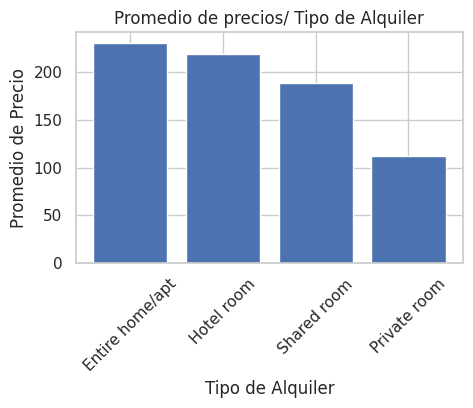

In [23]:
# - Promedio de precios por tipo de alquiler
room_price = d3.groupby('room_type')['price'].mean().round(2)
room_price1 = room_price.sort_values( ascending=False)
x = room_price1.index
y = room_price1.values
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x, y, label='Promedio por tipo de Alquiler')


plt.title('Promedio de precios/ Tipo de Alquiler')
plt.xlabel('Tipo de Alquiler')
plt.ylabel('Promedio de Precio')
plt.xticks(rotation=45)

print(room_price1)

### Análisis univariado distribución de Tipo de alojamiento

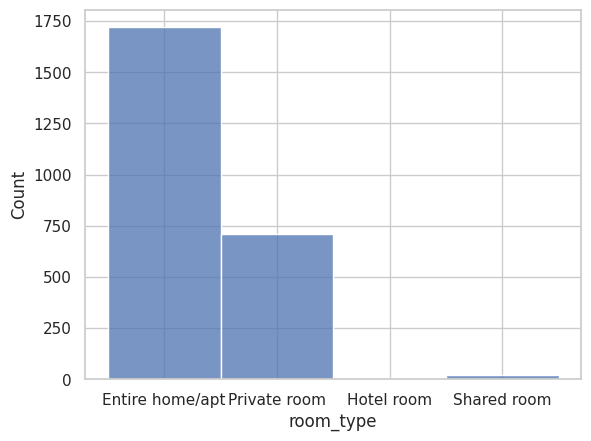

Entire home/apt    1720
Private room        711
Shared room          20
Hotel room            5
Name: room_type, dtype: int64


In [24]:

sns.histplot(d3['room_type'], kde=False)
plt.show()

count = d3['room_type'].value_counts()
print(count)

## Porcentajes de oferta segun la localidad:

Luego de conocer los precios promedios según el tipo de alquiler, es necesario conocer en qué localidades tienen mayor oferta dichos alquileres, lo que nos permite saber las ubicaciones donde mayor probabilidad de busquedas o interés de alquiler hay. Encontrando que:


***Porcentajes por Localidad***:

Manhattan        54.11 %

Brooklyn         37.83 %

Queens            6.27 %

Bronx             1.30 %

Staten Island     0.49 %

**Podemos notar que tanto en Manhattan como Brooklyn tienen la mayor cantidad de oferta de alquileres, indiferentemente de su tipo.**

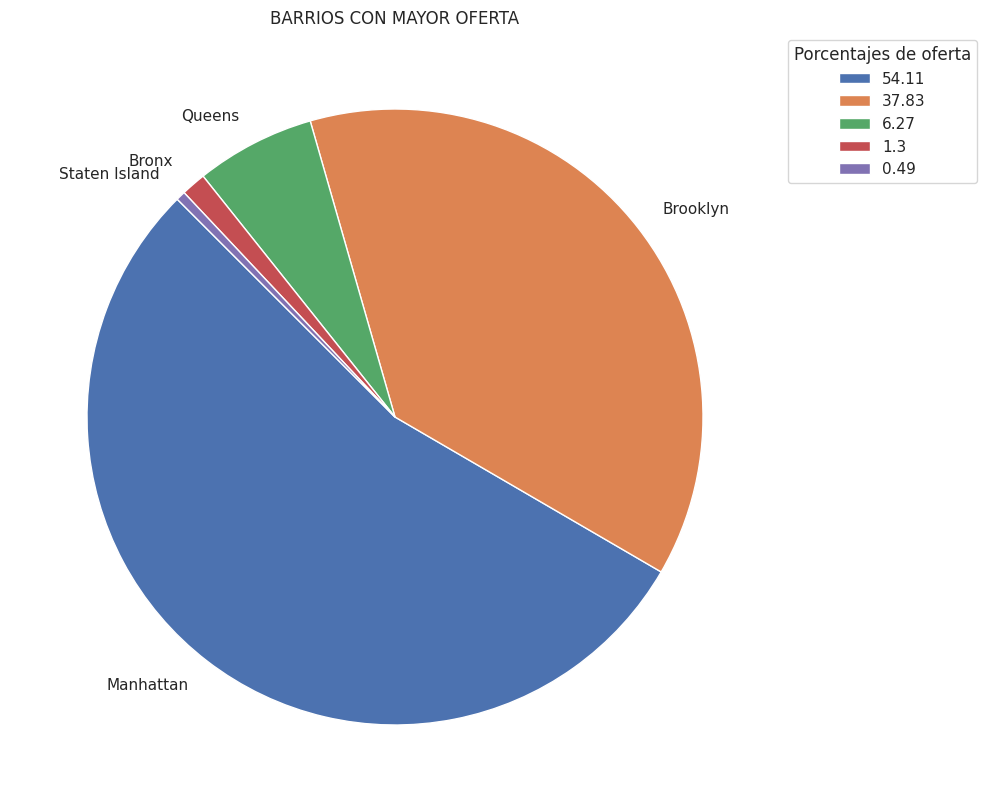

Manhattan        54.11
Brooklyn         37.83
Queens            6.27
Bronx             1.30
Staten Island     0.49
Name: neighbourhood_group, dtype: float64


In [25]:
# - Porcentaje de localidades con mas oferta
# Conteo de barrios totales del DataFrame d1

dist_barrios = d3['neighbourhood_group'].value_counts()

#Porcentajes
avg = d3['neighbourhood_group'].value_counts(normalize=True) * 100

avg1 = avg.round(2)
# Variables
x = avg1.index
y = avg1.values

plt.figure(figsize=(10, 10))
plt.pie(avg1, labels=x, startangle=135)
plt.subplots_adjust(left=0, right=0.85)
plt.gca().set_aspect('equal')

plt.legend(avg1, title='Porcentajes de oferta', bbox_to_anchor=(1, 1), loc='best')
plt.title('BARRIOS CON MAYOR OFERTA')

plt.show()
print(avg1)

### Analisis Univariado por Alojamiento

In [26]:
import plotly.express as px

fig = px.histogram(d3, x='neighbourhood_group', nbins=6)

#Atributos
fig.update_layout(

    title="Distribución por Alojamiento",

    # Eje x
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    # Margen
    margin=dict(l=140, r=40, b=50, t=80),
    # Configuración de la leyenda
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),

    width=600,
    height=300,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

fig.show()

## MEDIA DE PRECIOS SEGUN LA LOCALIDAD:

Analizando los siguientes resultados podemos ver que el tipo de alquiler de habitación de hotel ('Hotel room') solo se encuentra en la localidad de Brooklyn, mientras que el alquiler de habitación privada (Private room) y alquier entero (Entire home/apt) tienen mayor oferta en todas las localidades con promedios de precios más altos en este último, en las localidades de Manhattan y Brooklyn.

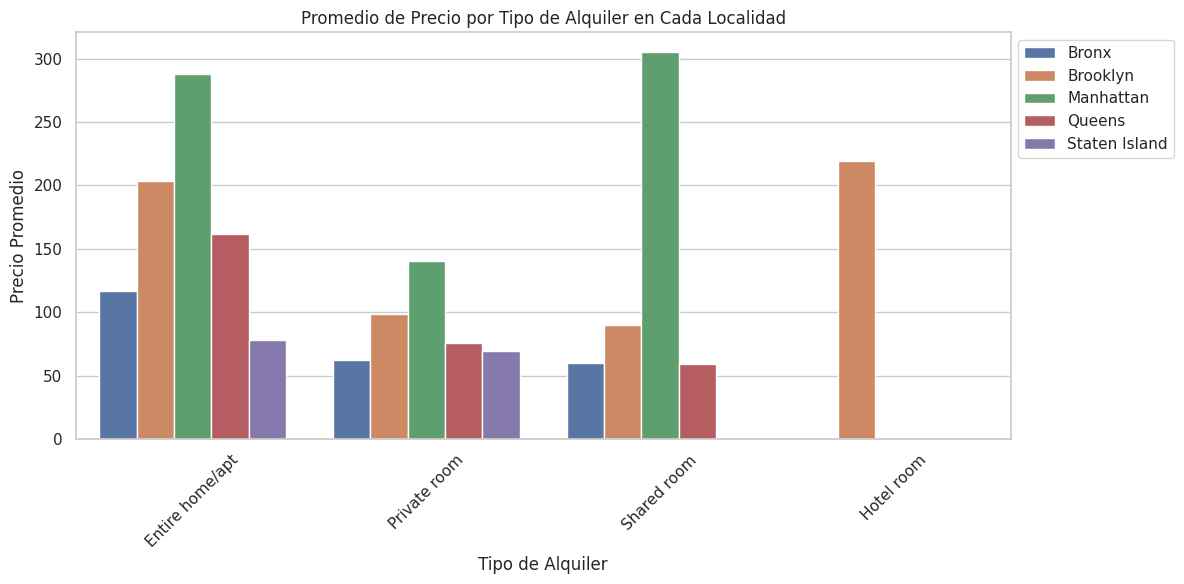

In [27]:
# - Promedio de precios por tipo de alquiler en cada localidad
prom_barrios = d1.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=prom_barrios)


plt.title("Promedio de Precio por Tipo de Alquiler en Cada Localidad")
plt.xlabel("Tipo de Alquiler")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

***Promedio de precios por tipo de alquiler en cada localidad***: Viendo los resultados podemos ver que el tipo de alquiler de habitación de hotel solo se encuentra en una sola localidad, mientras que el alquiler entero y habitación privada tiene mayor oferta en todas las localidades con promedios distintos en cada una de ellas.


## RELACION DEL PRECIO EN FUNCION A LOS DIAS DISPONIBLES:

### Analisis de correlación con una seleccion de columnas dentro del dataset, el objetivo es determinar relaciones entre variables ademas de la relacion del precio en funcion a los dias disponibles

<ipython-input-28-711eccf15b80>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



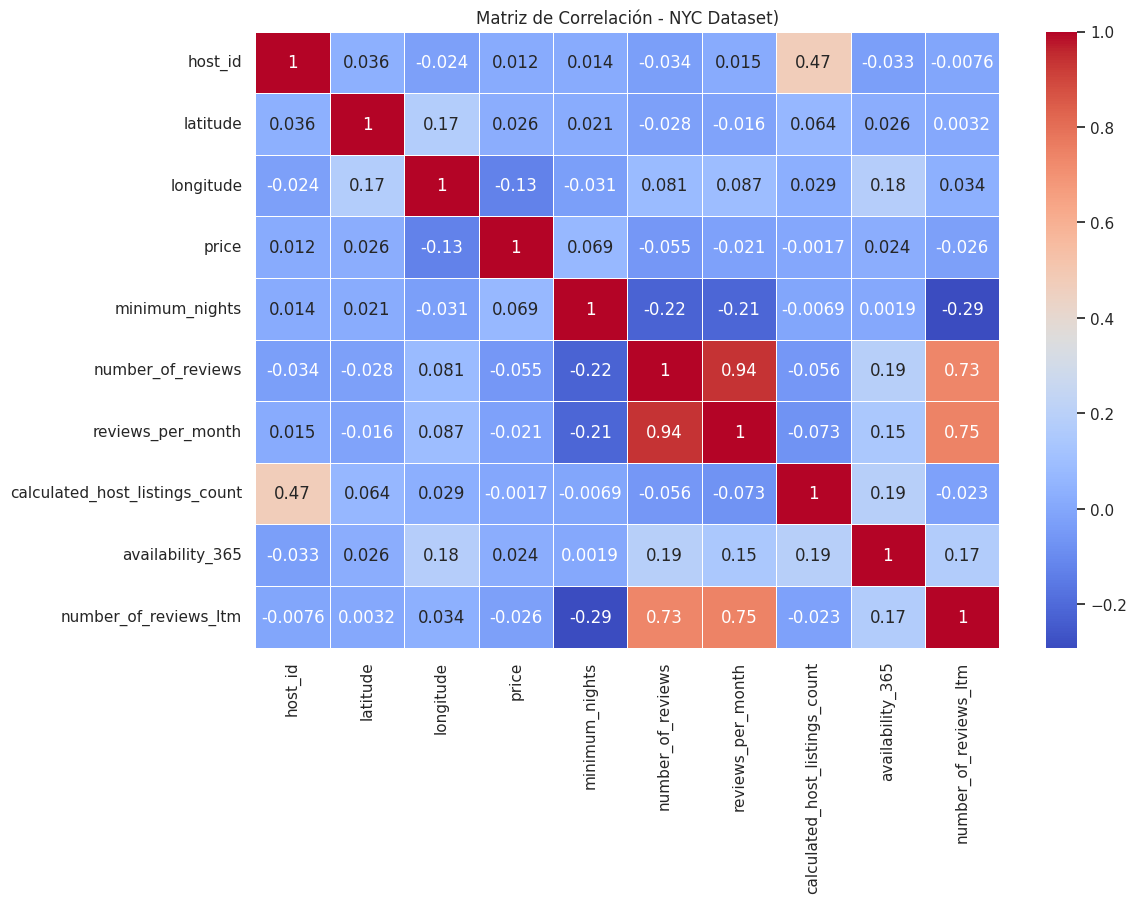

In [28]:
import matplotlib.pyplot as plt

#Filtrar las columnas medidas
columnas = ['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
sub_d3 = d3[columnas]

# Calcula la matriz de correlación para el subconjunto de columnas
correlation_matrix = sub_d3.corr()

# Crea un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación - NYC Dataset)")
plt.show()

In [30]:
sub_d3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2.845000e+03,Jennifer,Manhattan,Midtown,40.7536,-73.9856,Entire home/apt,150.0000,30.0000,49.000,2022-06-21,0.3000,3.0000,314.0000,1.000
1,5121,BlissArtsSpace!,7.356000e+03,Garon,Brooklyn,Bedford-Stuyvesant,40.6854,-73.9551,Private room,60.0000,30.0000,50.000,2019-12-02,0.3000,2.0000,365.0000,0.000
2,5203,Cozy Clean Guest Room - Family Apt,7.490000e+03,MaryEllen,Manhattan,Upper West Side,40.8038,-73.9675,Private room,75.0000,2.0000,118.000,2017-07-21,0.7200,1.0000,0.0000,0.000
3,5178,Large Furnished Room Near B'way,8.967000e+03,Shunichi,Manhattan,Midtown,40.7646,-73.9832,Private room,68.0000,2.0000,575.000,2023-02-19,3.4100,1.0000,106.0000,52.000
4,"5136,""Large Sunny Brooklyn Duplex, Patio + Gar...",Loft Suite,5.924846e+06,The Box House Hotel,Manhattan,Williamsburg,40.7298,-73.9591,Entire home/apt,195.4192,24.5735,67.557,2023-01-01,0.6545,2.7079,118.5279,5.852


<ipython-input-29-47092e23f078>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




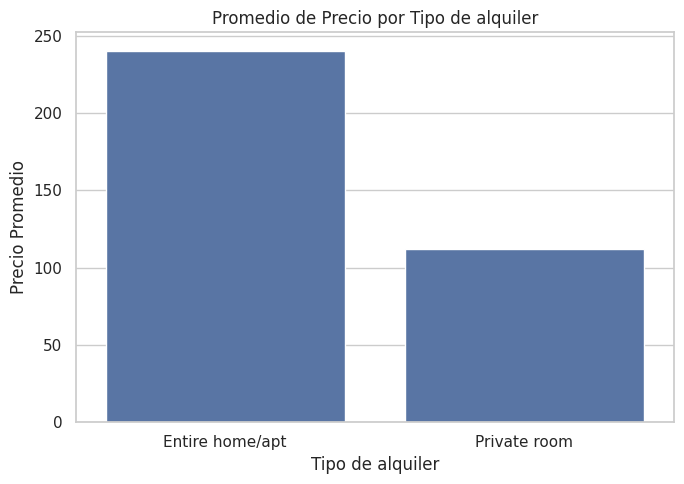

In [29]:
# - Promedio de precios segun el tipo de alquiler mas ofertado.
most_rent = d1[d1['room_type'].isin(['Entire home/apt', 'Private room'])]

sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x="room_type", y="price", data=most_rent, ci=None)
plt.title("Promedio de Precio por Tipo de alquiler")
plt.xlabel("Tipo de alquiler")
plt.ylabel("Precio Promedio")

plt.tight_layout()
plt.show()

### Análisis Multivariado:

La mayor cantidad de correlacion se puede notar en los reviews, sin embargo, el análisis de estas variables no determinan una incidencia sobre el precio, esto es debido a que no corresponde a variables categoricas que nos permitan determinar si estos reviews son buenos o malos, independientemente de sus cantidades.

### Análisis Bivariado:
No obstante, se procede al análisis bivariado entre el previo y los dias disponibles para corroborar la correlación observada previamente.

Una vez identificados los tipos de alquiler con mayor oferta según el gráfico anterior, los cuales son: alquiler Entero y Habitación provada, otra variable en relacion al precio independientemente de su ubicación es la relación del precio en función a los dias disponible, para esto, se traza una linea de tendencia en un gráfico de dispersión que permite ver la relacion del precio en funcion del tiempo.


Sin embargo, se observa que no hay una relación que señale variabilidad del precio conforme los alquileres dispongan de mayor disponibilidad. Por lo que dicha relación no impactaría en la toma de desiciones.

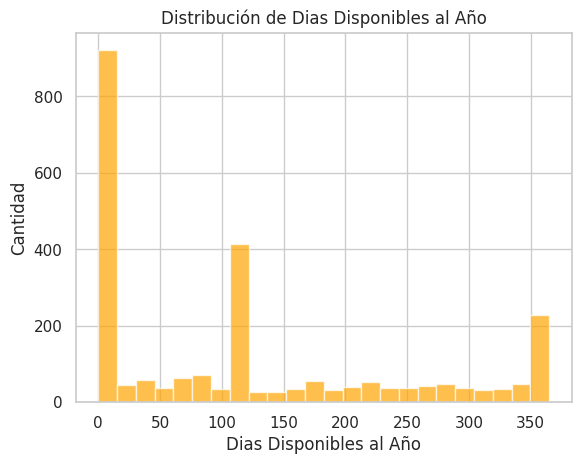

In [31]:
# Histograma
plt.hist(d3['availability_365'], bins=24, color='orange', alpha=0.7)

#Contexto del gráfico
plt.xlabel('Dias Disponibles al Año')
plt.ylabel('Cantidad')
plt.title('Distribución de Dias Disponibles al Año')
plt.show()

### Análisis Dias:

Se observa una distribución de días con ciertos outliers y promedios contenidos <25 dias, entre 100-120 dias y >350 dias.

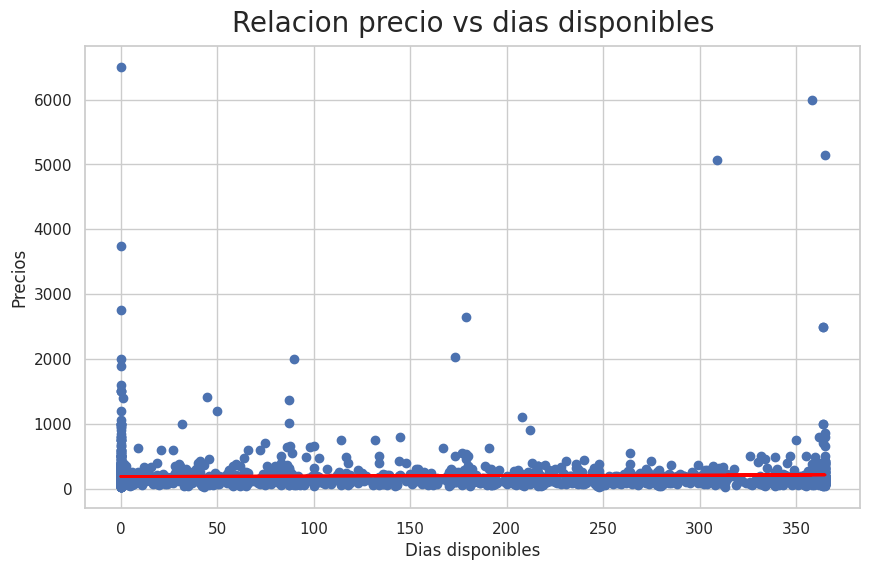

In [32]:
# Linea de tendencia de la relacion de precios vs dias disponibles
most_rent = d3[d3['room_type'].isin(['Entire home/apt', 'Private room'])]

dias = most_rent['availability_365']
precio = most_rent['price']

# Calculo de coeficientes
coefficients = np.polyfit(dias, precio, 1)
b, a = coefficients

#Línea de tendencia
trend_line = b * dias + a

plt.figure(figsize=(10, 6))
plt.scatter(dias, precio)
plt.plot(dias, trend_line, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("Relacion precio vs dias disponibles", fontsize=20, verticalalignment='bottom');
plt.xlabel("Dias disponibles");
plt.ylabel("Precios");

## VARIABILIDAD DE PRECIOS SEGUN LOCALIDAD - ALOJAMIENO ENTERO Y HABITACIÓN ENTERA:

Podemos observar como las localidades de Manhattan y Brooklyn tienen mayor variedad de precios segun los tipos de alojamientos mencionados, los cuales superan los 1000 U$D en ambas localidades.

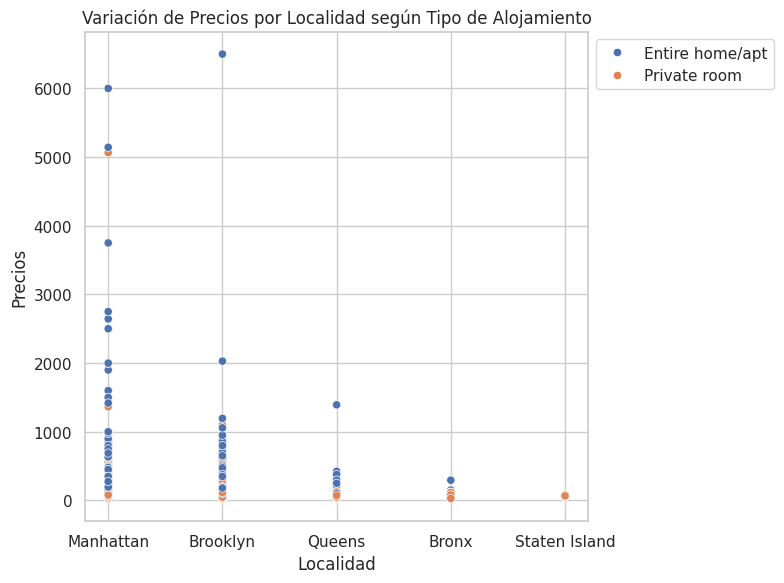

In [33]:
# - Relacion de precios segun localidad (Alojamiento entero, Habitacion privada)
plt.figure(figsize=(8, 6))

sns.scatterplot(data=most_rent, x='neighbourhood_group', y='price', hue = 'room_type')

plt.xlabel('Localidad')
plt.ylabel('Precios')
plt.title('Variación de Precios por Localidad según Tipo de Alojamiento')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


## RANGO DE PRECIOS SEGUN CADA BARRIO EN LAS LOCALIDADES DE MANHATTAN Y BROOKLYN:

Una vez determinado que las localidades de Manhattan y Brooklyn son aquellas con mayor oferta para los tipos de alojamiento entero y habitación privada, es necesario conocer el rango de precios segun cada barrio para estas localidades seleccionadas, obteniendo los siguientes resultados:

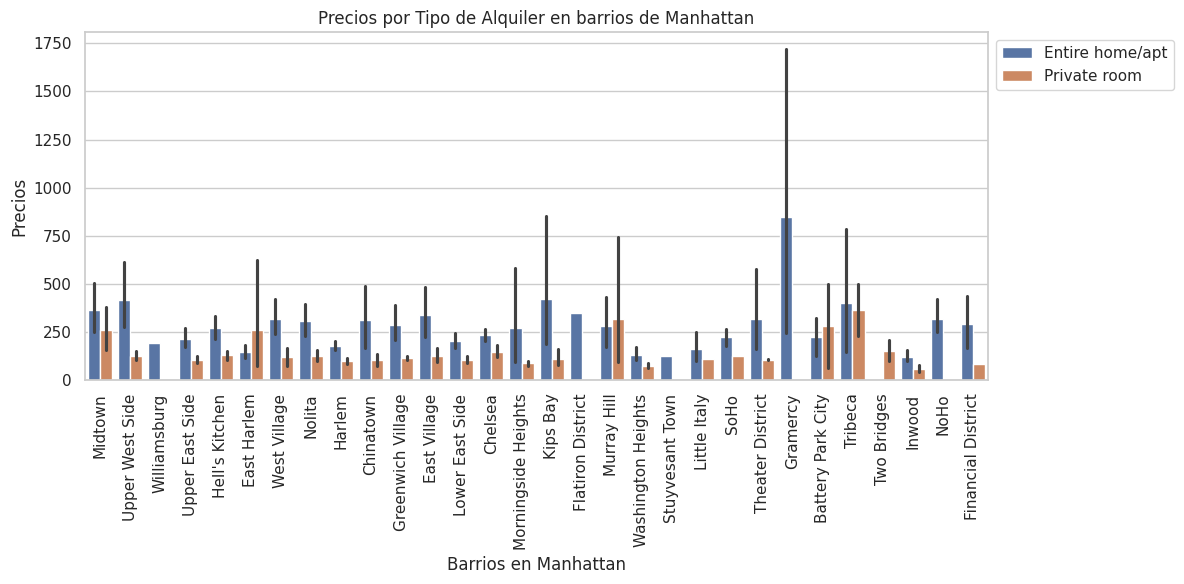

In [34]:
# - Precios por tipo de alquiler en los barrios de las localidades con mayor oferta: MANHATTAN

most_rent_m = most_rent[most_rent['neighbourhood_group'].isin(['Manhattan'])]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="price", hue="room_type", data=most_rent_m)
most_rent_mi = most_rent_m['neighbourhood'].value_counts()


plt.xlabel('Barrios en Manhattan')
plt.ylabel('Precios')
plt.title('Precios por Tipo de Alquiler en barrios de Manhattan')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


***Precios por tipo de alquiler en los barrios de Manhattan:***

Dentro de la localidad de Manhattan los barrios con mayor oferta de alquiler mayor igual a 50 ofertas son:


Harlem:                 157

Upper West Side:        103

East Village:            97

Upper East Side:         82

Chelsea:                 55

Hell's Kitchen:          54

East Harlem:             50

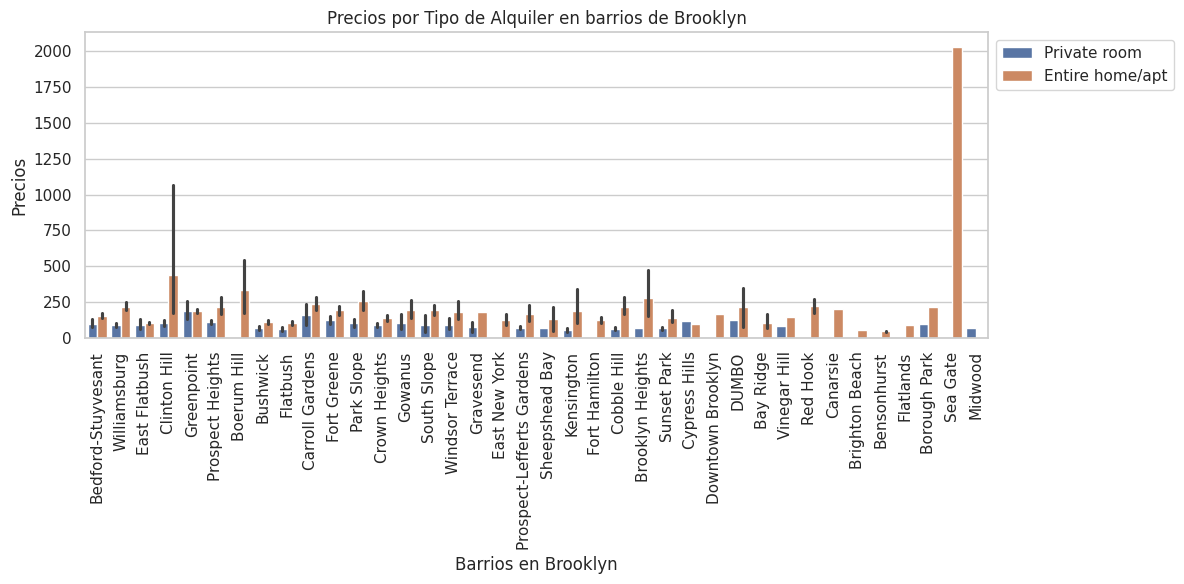

In [35]:
#Relacion de precio por barrio primero en Brooklyn

most_rent_b = most_rent[most_rent['neighbourhood_group'].isin(['Brooklyn'])]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="price", hue="room_type", data=most_rent_b)
most_rent_bi = most_rent_b['neighbourhood'].value_counts()

plt.xlabel('Barrios en Brooklyn')
plt.ylabel('Precios')
plt.title('Precios por Tipo de Alquiler en barrios de Brooklyn')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

***Precios por tipo de alquiler en los barrios de Brooklyn:***

Dentro de la localidad de Brooklyn los barrios con mayor oferta de alquiler igual o por encima de 50 ofertas son:

Williamsburg:                185

Bedford-Stuyvesant:           155

Greenpoint:                    80

Crown Heights:                 68

Bushwick:                      50

## **SELECCION DE FEATURES / REGRESION / ANALISIS DE METRICAS / CONCLUSIONES**

In [36]:

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.formula.api as sm

import os

In [ ]:
print(most_rent)

           id                                name     host_id  host_name  \
0        2595               Skylit Midtown Castle      2845.0   Jennifer   
1        5121                     BlissArtsSpace!      7356.0      Garon   
2        5203  Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3        5178    Large Furnished Room Near B'way　      8967.0   Shunichi   
6        5586  Rooftop Deck/City Views. Great Apt      8526.0      Susan   
...       ...                                 ...         ...        ...   
2451  3677436   Spacious 1BR in heart of Brooklyn  18678912.0      Shena   
2452  3749971  Williamsburg Apt. w/ private patio  10094431.0      Sofia   
2453  3677769       Beautiful Large Sunny Bedroom  18681479.0     Pamela   
2454  3752035   New & Modern 2 BR Brownstone Apt.  14961638.0      Elito   
2455  3511778    10th St / W Village  Junior Loft  17681072.0     Brooks   

     neighbourhood_group       neighbourhood  latitude  longitude  \
0              Man

In [ ]:
# Ajuste de Data Frame para valores numericos
d2 = most_rent
# Codigo numerico de los barrios
codigo_barrio_dic = {
    'Manhattan': 100,
    'Brooklyn': 200,
    'Queens': 300,
    'Bronx': 400}

room_type_dic = {
    'Entire home/apt': 1100,
    'Private room': 1200,
    'Shared room': 1300,
    'Hotel room': 1400}
# asignacion de codigos en una nueva columna
d2['codigo_barrio']= most_rent['neighbourhood_group'].map(codigo_barrio_dic)
d2['codigo_room']= most_rent['room_type'].map(room_type_dic)
d2['codigo_barrio'] = pd.to_numeric(d2['codigo_barrio'], downcast='integer', errors='coerce')

# completa los campos categoricos con la moda
nan_neighbourhood_group = d2['neighbourhood_group'].mode()[0]
nan_neighbourhood = d2['neighbourhood'].mode()[0]
d2['neighbourhood_group'].fillna(nan_neighbourhood_group, inplace=True)
d2['neighbourhood'].fillna(nan_neighbourhood, inplace=True)
d2['license'].fillna('0', inplace=True)

#elimina los campos vacios
d2 = d2.dropna()


print(d2)

           id                                name     host_id  host_name  \
0        2595               Skylit Midtown Castle      2845.0   Jennifer   
1        5121                     BlissArtsSpace!      7356.0      Garon   
2        5203  Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3        5178    Large Furnished Room Near B'way　      8967.0   Shunichi   
6        5586  Rooftop Deck/City Views. Great Apt      8526.0      Susan   
...       ...                                 ...         ...        ...   
2451  3677436   Spacious 1BR in heart of Brooklyn  18678912.0      Shena   
2452  3749971  Williamsburg Apt. w/ private patio  10094431.0      Sofia   
2453  3677769       Beautiful Large Sunny Bedroom  18681479.0     Pamela   
2454  3752035   New & Modern 2 BR Brownstone Apt.  14961638.0      Elito   
2455  3511778    10th St / W Village  Junior Loft  17681072.0     Brooks   

     neighbourhood_group       neighbourhood  latitude  longitude  \
0              Man

<ipython-input-8-8a1cfa82add5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['codigo_barrio']= most_rent['neighbourhood_group'].map(codigo_barrio_dic)
<ipython-input-8-8a1cfa82add5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['codigo_room']= most_rent['room_type'].map(room_type_dic)
<ipython-input-8-8a1cfa82add5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Ajuste de DataFrame para la seleccion de features

d2['price'] = most_rent.price
features_drop = ["id","name","host_name","neighbourhood_group","neighbourhood","room_type","last_review"]
x = d2.drop(columns=features_drop)       # Matriz de características
y = d2['price']

<ipython-input-9-ab1fe6cbaadc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['price'] = most_rent.price


In [ ]:
x

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,codigo_barrio,codigo_room
0,2845.0,40.75356,-73.98559,150.0,30.0,49.0,0.30,3.0,314.0,1.0,0,100.0,1100
1,7356.0,40.68535,-73.95512,60.0,30.0,50.0,0.30,2.0,365.0,0.0,0,200.0,1200
2,7490.0,40.80380,-73.96751,75.0,2.0,118.0,0.72,1.0,0.0,0.0,0,100.0,1200
3,8967.0,40.76457,-73.98317,68.0,2.0,575.0,3.41,1.0,106.0,52.0,0,100.0,1200
6,8526.0,40.76076,-73.96156,295.0,4.0,45.0,0.27,1.0,1.0,4.0,0,100.0,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,18678912.0,40.63387,-73.96224,103.0,2.0,9.0,0.09,1.0,63.0,1.0,0,200.0,1100
2452,10094431.0,40.71649,-73.96180,115.0,30.0,95.0,0.91,1.0,0.0,0.0,0,200.0,1200
2453,18681479.0,40.74329,-73.92317,75.0,30.0,118.0,1.14,1.0,0.0,0.0,0,300.0,1200
2454,14961638.0,40.68599,-73.95538,181.0,3.0,110.0,1.11,1.0,153.0,22.0,0,200.0,1100


In [ ]:
y

0       150.0
1        60.0
2        75.0
3        68.0
6       295.0
        ...  
2451    103.0
2452    115.0
2453     75.0
2454    181.0
2455    275.0
Name: price, Length: 1841, dtype: float64

In [ ]:
# Método de Bi-directional Elimination (Stepwise)
sfs_stepwise = SFS(LinearRegression(),
                   k_features=6,
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise.fit(x, y)
selected_features_stepwise = sfs_stepwise.k_feature_names_
print("Bi-directional Elimination (Stepwise) - Características seleccionadas:", selected_features_stepwise)

Bi-directional Elimination (Stepwise) - Características seleccionadas: ('host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews')


In [ ]:
#LIBRERIAS
! pip install chart_studio
import chart_studio.plotly     as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.0 MB/s eta 0:00:00


# **Regresion lineal con seleccion de feature**

In [ ]:
# Features seleccionados:
d2_x = d2[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(d2_x, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(x_test)
print(d2_x)

         host_id  latitude  longitude  minimum_nights  number_of_reviews
0         2845.0  40.75356  -73.98559            30.0               49.0
1         7356.0  40.68535  -73.95512            30.0               50.0
2         7490.0  40.80380  -73.96751             2.0              118.0
3         8967.0  40.76457  -73.98317             2.0              575.0
6         8526.0  40.76076  -73.96156             4.0               45.0
...          ...       ...        ...             ...                ...
2451  18678912.0  40.63387  -73.96224             2.0                9.0
2452  10094431.0  40.71649  -73.96180            30.0               95.0
2453  18681479.0  40.74329  -73.92317            30.0              118.0
2454  14961638.0  40.68599  -73.95538             3.0              110.0
2455  17681072.0  40.73223  -73.99265            60.0               12.0

[1841 rows x 5 columns]


# **Metricas de regresion**

In [ ]:
#MAE
mse = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 81.99238553291259


In [ ]:
#mse
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 15901.682774117638


El MAE y un MSE bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que es deseable.

In [ ]:
#R2
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R^2: {r2}")

R^2: 0.07064849525174943


## **Regresion Lineal con Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Features seleccionados:
d2_x = d2[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(d2_x, y, test_size=0.2, shuffle=True)

# Crear un modelo de regresión lineal
model =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model.fit(X_train,y_train)
# Predecir los valores en el conjunto de prueba
predicciones= model.predict(X_test)


In [ ]:
#Evaluamos las métricas de regresión con validación simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y_test, y_pred= predicciones))
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))
print('R2: ',r2_score(y_true= y_test, y_pred= predicciones))

MSE:  31163.63101871426
MAE:  90.27659748827399
R2:  0.014971444477601459


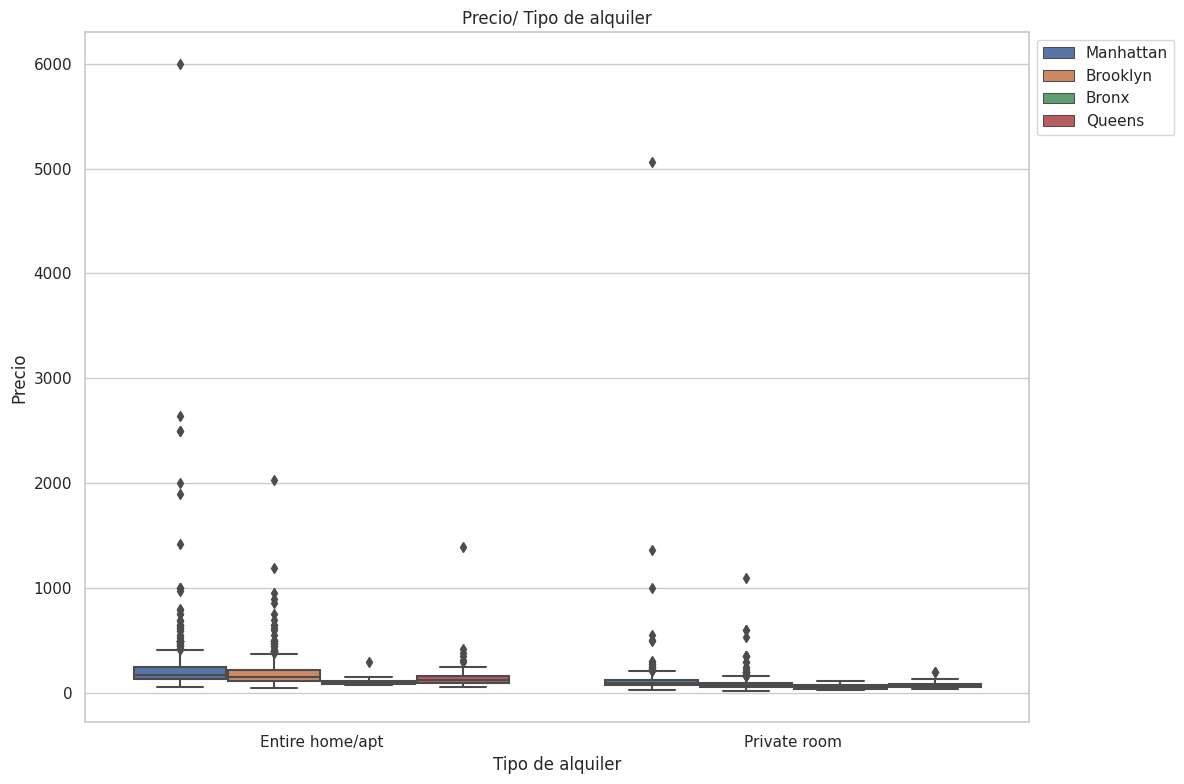

In [ ]:
#Deteccion de outliers del precio
plt.figure(figsize=(12,8))

#Boxplot
sns.boxplot(x=d2.room_type, y= d2.price, hue=d2.neighbourhood_group)

#Contextualizamos el gráfico
plt.title('Precio/ Tipo de alquiler')
plt.xlabel('Tipo de alquiler')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
#Debido a la existencia de outliers muy fuera de rango se procede a filtrar el dataset solo para obtener valores del precio dentro del rango intercuartilico
Q1 = d2['price'].quantile(0.25)
Q3 = d2['price'].quantile(0.75)
IQR = Q3 - Q1
filtro = (d2['price'] >= Q1 - 1.5 * IQR) & (d2['price'] <= Q3 + 1.5 * IQR)
d3 = d2[filtro]
d3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,codigo_barrio,codigo_room
0,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150.0,30.0,49.0,2022-06-21,0.30,3.0,314.0,1.0,0,100.0,1100
1,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,2019-12-02,0.30,2.0,365.0,0.0,0,200.0,1200
2,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75.0,2.0,118.0,2017-07-21,0.72,1.0,0.0,0.0,0,100.0,1200
3,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,575.0,2023-02-19,3.41,1.0,106.0,52.0,0,100.0,1200
6,5586,Rooftop Deck/City Views. Great Apt,8526.0,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295.0,4.0,45.0,2022-10-03,0.27,1.0,1.0,4.0,0,100.0,1100


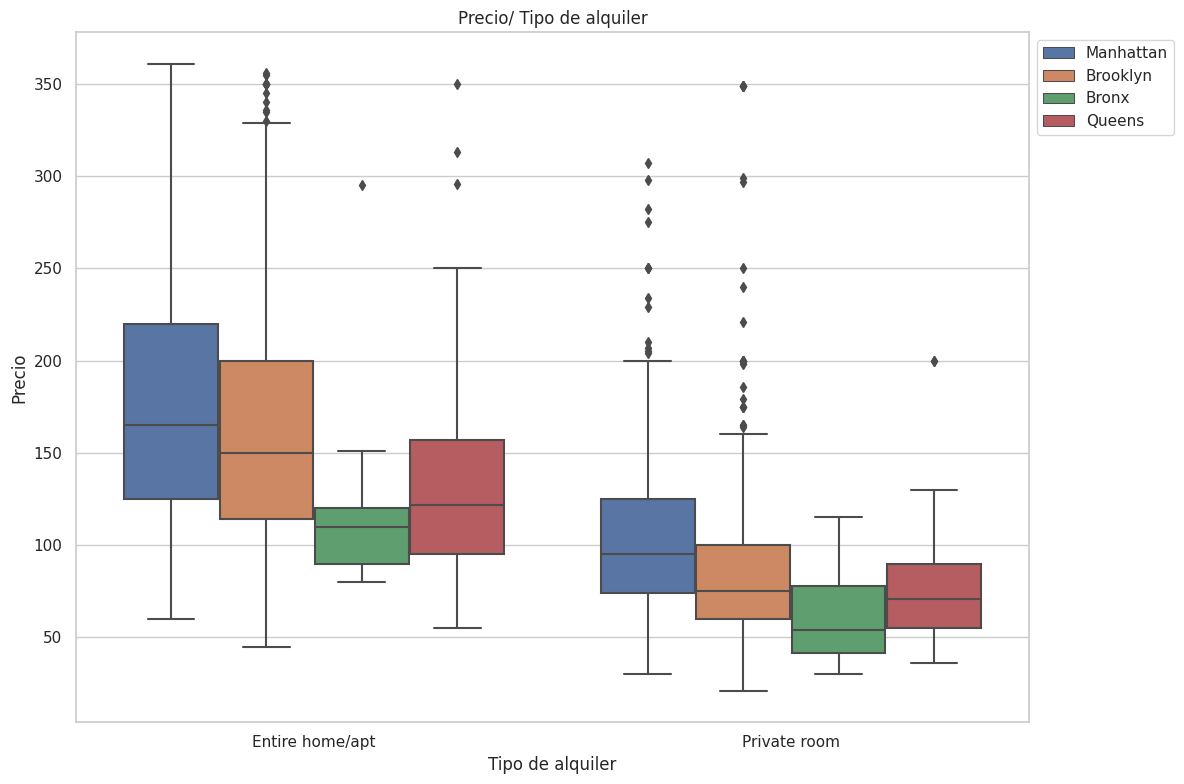

In [ ]:
#Deteccion de outliers del precio
plt.figure(figsize=(12,8))

#Boxplot
sns.boxplot(x=d3.room_type, y= d3.price, hue=d3.neighbourhood_group)

#Contextualizamos el gráfico
plt.title('Precio/ Tipo de alquiler')
plt.xlabel('Tipo de alquiler')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
# Ajuste de DataFrame para la seleccion de features

d3['price'] = d2.price
features_drop = ["id","name","host_name","neighbourhood_group","neighbourhood","room_type","last_review"]
x1 = d3.drop(columns=features_drop)       # Matriz de características
y1 = d3['price']

<ipython-input-16-b0ffca2a7e41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['price'] = d2.price


In [ ]:
# Método de Bi-directional Elimination (Stepwise)
sfs_stepwise = SFS(LinearRegression(),
                   k_features=6,
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise.fit(x1, y1)
selected_features_stepwise = sfs_stepwise.k_feature_names_
print("Bi-directional Elimination (Stepwise) - Características seleccionadas:", selected_features_stepwise)

Bi-directional Elimination (Stepwise) - Características seleccionadas: ('host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews')


### **Se creo un modelo nuevo con Random forest Regressor con el nuevo rango de price**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Features seleccionados:
d3_x = d3[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(d3_x, y1, test_size=0.2, shuffle=True)

# Crear un modelo de regresión lineal
model2 =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=10)
# Ajuste
model2.fit(X1_train,y1_train)
# Predecir los valores en el conjunto de prueba
prediction= model2.predict(X1_test)

In [ ]:
#Evaluamos las métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y1_test, y_pred= prediction))
print('MAE: ',mean_absolute_error(y_true= y1_test, y_pred= prediction))
print('R2: ',r2_score(y_true= y1_test, y_pred= prediction))

MSE:  4303.906611510973
MAE:  51.341521045553186
R2:  0.16445144017503233


Mejoró mucho el modelo a pesar de no se el mejor, paso de un R2: 0.014 a 0.164

### **Se creo de modelo nuevo con Regresion lineal con el nuevo rango de price**

In [ ]:
# Features seleccionados:
d3_x = d3[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
x2_train, x2_test, y2_train, y2_test = train_test_split(d3_x, y1, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model3 = LinearRegression()
model3.fit(x2_train, y2_train)

# Predecir los valores en el conjunto de prueba
y2_pred = model3.predict(x2_test)

In [ ]:
#Evaluamos las métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y2_test, y_pred= y2_pred))
print('MAE: ',mean_absolute_error(y_true= y2_test, y_pred= y2_pred))
print('R2: ',r2_score(y_true= y2_test, y_pred= y2_pred))

MSE:  4956.9091797625115
MAE:  55.58333241030532
R2:  0.06932400662163796


No mejoró el valor de R2 paso de 0.070 a 0.069

## **Se puede segmentar la regresion para obtener dos modelos segun el tipo de alquiler, Entire home/apt y Private room**

In [ ]:
#Separacion de datasets para nuevos modelos
d4 = d3[d3['room_type'].isin(['Entire home/apt'])] #Dataset solo de Apto enteros
d5 = d3[d3['room_type'].isin(['Private room'])] #Dataset solo de Habitaciones privadas


In [ ]:
d4.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,codigo_barrio,codigo_room
0,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150.0,30.0,49.0,2022-06-21,0.30,3.0,314.0,1.0,0,100.0,1100
6,5586,Rooftop Deck/City Views. Great Apt,8526.0,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295.0,4.0,45.0,2022-10-03,0.27,1.0,1.0,4.0,0,100.0,1100
9,6848,Only 2 stops to Manhattan studio,15991.0,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30.0,189.0,2023-02-04,1.13,1.0,207.0,5.0,0,200.0,1100
11,67288,Central Park 1BR sunny condo,101597.0,Per,Manhattan,East Harlem,40.79544,-73.94836,Entire home/apt,250.0,28.0,47.0,2022-12-14,0.37,1.0,81.0,9.0,0,100.0,1100
12,31555,Luminous Beautiful West Village Studio,135619.0,Tom,Manhattan,West Village,40.73405,-74.00281,Entire home/apt,120.0,30.0,32.0,2021-03-27,0.22,1.0,0.0,0.0,0,100.0,1100


In [ ]:
d5.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,codigo_barrio,codigo_room
1,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,2019-12-02,0.30,2.0,365.0,0.0,0,200.0,1200
2,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75.0,2.0,118.0,2017-07-21,0.72,1.0,0.0,0.0,0,100.0,1200
3,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,575.0,2023-02-19,3.41,1.0,106.0,52.0,0,100.0,1200
8,31130,Most Central Location!,117287.0,Lara Nicole,Manhattan,Hell's Kitchen,40.76720,-73.98464,Private room,200.0,1.0,68.0,2021-10-01,0.44,4.0,310.0,0.0,0,100.0,1200
10,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104.0,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30.0,1.0,2022-06-05,0.11,2.0,204.0,1.0,0,100.0,1200


### **Regresion Lineal para los alojamientos Enteros**

Se utilizan los mismos features obtenidos previamente y se declaran las nuevas variables x,y para la regresion

In [ ]:
x2 = d4.drop(columns=features_drop)
y2 = d4['price']

from sklearn.ensemble import RandomForestRegressor
# Features seleccionados:
d4_x = d4[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
X3_train, X3_test, y3_train, y3_test = train_test_split(d4_x, y2, test_size=0.2, shuffle=True)

# Crear un modelo de regresión lineal
model3 =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=10)
# Ajuste
model3.fit(X3_train,y3_train)
# Predecir los valores en el conjunto de prueba
prediction1= model3.predict(X3_test)

In [ ]:
#Evaluamos las métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y3_test, y_pred= prediction1))
print('MAE: ',mean_absolute_error(y_true= y3_test, y_pred= prediction1))
print('R2: ',r2_score(y_true= y3_test, y_pred= prediction1))

MSE:  3608.9878698259017
MAE:  46.22901573677421
R2:  0.22942724344957677


### **Regresion Lineal para los alojamientos de Habitacion privada**

Se utilizan los mismos features obtenidos previamente y se declaran las nuevas variables x,y para la regresion

In [ ]:
x3 = d5.drop(columns=features_drop)
y3 = d5['price']

from sklearn.ensemble import RandomForestRegressor
# Features seleccionados:
d5_x = d5[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
X5_train, X5_test, y5_train, y5_test = train_test_split(d5_x, y3, test_size=0.2, shuffle=True)

# Crear un modelo de regresión lineal
model5 =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=10)
# Ajuste
model5.fit(X5_train,y5_train)
# Predecir los valores en el conjunto de prueba
prediction2= model5.predict(X5_test)

In [ ]:
#Evaluamos las métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y5_test, y_pred= prediction2))
print('MAE: ',mean_absolute_error(y_true= y5_test, y_pred= prediction2))
print('R2: ',r2_score(y_true= y5_test, y_pred= prediction2))

MSE:  1416.8759540626884
MAE:  29.336391790543676
R2:  0.3949096028599314


### **Se pudo mejorar las metricas de R2 para ambas regresiones, anterioemente estaban en 0.069 y ahora por encima de 0.22**

## **PCA para la evaluacion de las variables del modelo de Alojamiento Entero**




In [ ]:
#PCA Escalamiento de datos

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X3_train = pca.fit_transform(X3_train)
X3_test = pca.transform(X3_test)

In [ ]:
#Varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27041494, 0.22545227, 0.19923316, 0.15775062, 0.147149  ])

In [ ]:
from sklearn.decomposition import PCA



pca = PCA(n_components=3)

X3_train = pca.fit_transform(X3_train)

X3_test = pca.transform(X3_test)

In [ ]:
model6 =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model6.fit(X3_train,y3_train)
# Predecir los valores en el conjunto de prueba
prediction3= model6.predict(X3_test)

In [ ]:
#Evaluamos las métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y3_test, y_pred= prediction3))
print('MAE: ',mean_absolute_error(y_true= y3_test, y_pred= prediction3))
print('R2: ',r2_score(y_true= y3_test, y_pred= prediction3))

MSE:  4526.969702207136
MAE:  54.668295986413696
R2:  0.019360891350940546


## **PCA para la evaluacion de las variables del modelo de Alojamiento Habitacion Privada**


In [ ]:
#PCA Escalamiento de datos

from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X5_train = sc1.fit_transform(X5_train)
X5_test = sc1.transform(X5_test)

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA()

X5_train = pca1.fit_transform(X5_train)
X5_test = pca1.transform(X5_test)

In [ ]:
#Varianza explicada para cada componente
explained_variance1 = pca1.explained_variance_ratio_
explained_variance1

array([0.24241614, 0.22572165, 0.20144192, 0.17245397, 0.15796633])

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)

X5_train = pca.fit_transform(X5_train)

X5_test = pca.transform(X5_test)

In [ ]:
model7 =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model7.fit(X5_train,y5_train)
# Predecir los valores en el conjunto de prueba
prediction4= model7.predict(X5_test)

In [ ]:
#Evaluamos las métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y5_test, y_pred= prediction4))
print('MAE: ',mean_absolute_error(y_true= y5_test, y_pred= prediction4))
print('R2: ',r2_score(y_true= y5_test, y_pred= prediction4))

MSE:  2240.1111733442654
MAE:  31.6379771509596
R2:  0.13965176686788006


# **CROSS VALIDATION**

### Tomando en cuenta la Regresion Lineal para los alojamientos de Habitacion privada

In [ ]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
CV = LeaveOneOut()

In [ ]:
#Evaluar el modelo con respecto al MAE

from sklearn.metrics import mean_squared_error,  make_scorer, mean_absolute_error

MAE1 = make_scorer(mean_absolute_error)
scores = cross_val_score(model5, X5_train, y5_train, scoring=MAE1, cv=CV,error_score='raise',verbose=1)
# convertir a postivos
scores = abs(scores)
# reportar el performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.6s


MAE: 31.404 (30.113)


El MAE anterior habia dado 29.33 USD, un error mas bajo que con la cross validación.

In [ ]:
scores1 = cross_val_score(model5, X5_train, y5_train, cv=4, scoring='r2')

In [ ]:
mean_r2 = np.mean(scores1)
print("Promedio de R^2:", mean_r2)

Promedio de R^2: 0.1723279125003924


El R2 de la regresion original era de 0.39, mucho mas cercano a 1 que el R2 con la validación.